In [46]:
# Heart Disease Prediction using Machine Learning

## 1. Data Loading & Exploration
## 2. Data Preprocessing
## 3. Baseline Model (Logistic Regression)
## 4. Tree-Based Models (RF, XGBoost)
## 5. Cross-Validation (Stratified K-Fold)
## 6. Feature Importance
## 7. Final Model & Kaggle Submission

In [47]:
import numpy as np
import pandas as pd


In [48]:
df = pd.read_csv('/content/drive/MyDrive/playground-series-s6e2 (2)/train.csv')
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [49]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

,0
id,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0


In [50]:
df['Heart Disease'] = df['Heart Disease'].map({'Presence':1,'Absence':0})

In [51]:
X = df.drop(['Heart Disease','id'],axis=1)
y = df['Heart Disease']

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [53]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [54]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [55]:
y_pred1_proba = model.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred1_proba)

np.float64(0.9515487612607161)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    random_state=42
)
rf.fit(X_train,y_train)
y_pred2 = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred2)

np.float64(0.9515276152810146)

In [57]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    eval_metric = 'auc'
)

xgb_model.fit(X_train,y_train)
y_pred3 = xgb_model.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred3)

np.float64(0.9559614521990922)

In [58]:
xgb_model.fit(X,y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
df_test = pd.read_csv('/content/drive/MyDrive/playground-series-s6e2 (2)/test.csv')

In [60]:
test_pred = xgb_model.predict_proba(df_test.drop('id',axis=1))[:,1]

In [61]:
Submission1 = pd.DataFrame({'id':df_test['id'],'Heart Disease':test_pred})
Submission1.head()

,id,Heart Disease
0,630000,0.957829
1,630001,0.010174
2,630002,0.985554
3,630003,0.006678
4,630004,0.193373


In [62]:
Submission1.to_csv("Submisson1.csv",index=False)

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, val_idx in skf.split(X, y):
    X_tr, X_va = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_va = y.iloc[train_idx], y.iloc[val_idx]

    model = xgb.XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        eval_metric='auc'
    )

    model.fit(X_tr, y_tr)
    preds = model.predict_proba(X_va)[:,1]
    scores.append(roc_auc_score(y_va, preds))

np.mean(scores)

np.float64(0.9551253078687789)

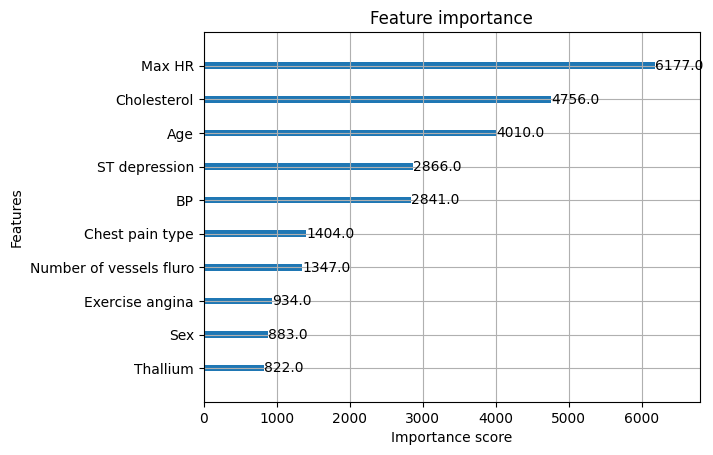

In [64]:
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()

In [65]:
test_df = pd.read_csv('/content/drive/MyDrive/playground-series-s6e2 (2)/test.csv')
test_df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7


In [66]:
final_model = xgb.XGBClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=6,
    eval_metric='auc'
)

final_model.fit(X,y)
test_preds = final_model.predict_proba(test_df.drop('id',axis=1))[:,1]

In [67]:
Submission2 = pd.DataFrame({'id':test_df['id'],'Heart Disease':test_preds})
Submission2.head()

,id,Heart Disease
0,630000,0.963925
1,630001,0.010514
2,630002,0.986461
3,630003,0.006482
4,630004,0.180225


In [68]:
Submission2.to_csv("Submisson2.csv",index=False)